<head>
<link rel="stylesheet" href="../../../cssthemes/github.css">
<meta name="viewport" content="initial-scale=1, width=device-width">
</head>

In [54]:
import sys
print(sys.executable)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.colors = "Linux"
InteractiveShell.separate_in = 0
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('fivethirtyeight')

/home/jcmint/anaconda3/envs/learningenv/bin/python


# Decision Tree
Needed to install scikit-learn package with conda.

In [4]:
# Import libraries for decision tree
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from random import randint
# Import Data
data = pd.read_csv('Week-7-MachineLearning/weather/daily_weather.csv')
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


## Cleaning Data
The tutorial wants to do a few things with the data
* drop 'number' column
* drop NA rows

In [5]:
clean_data = data.copy()
clean_data[clean_data.isnull().any(axis = 1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


I will drop these rows for now. However, that isn't the only thing you can do with them (you could use linear interpolation since they are numeric and this is time series data with evenly spaces intervals)

In [6]:
del clean_data['number']
clean_data = clean_data.dropna()

## Prep data for analysis
* Bin humidity values into low (0) and high (1) to make it a binary classification problem and store in `high_humidity_label`
* store bin labels as `y`
* Store training variables names into `morning_features`, then store training data into `x`
* split `x` and `y` into training and testing subsets, `x_train`, `x_test`, `y_train`, `y_test`

In [67]:
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] >= 25)*1
clean_data[['high_humidity_label','relative_humidity_3pm']].head(8)
y=clean_data[['high_humidity_label']].copy()
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
'rain_duration_9am']
x = clean_data[morning_features].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324).copy()

,high_humidity_label,relative_humidity_3pm
0,1,36.160000
1,0,19.426597
2,0,14.460000
3,0,12.742547
4,1,76.740000
5,1,33.930000
6,0,21.385657
7,1,74.920000


## Fit decision tree classifier and generate predictions
* Create decision tree object (object attributes passed)
* run decision tree method with training data
* run decision tree method with testing intput data
* look at results, calculate average accuracy

In [19]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0);
humidity_classifier.fit(x_train, y_train);
y_test.loc[:,'predictions'] = humidity_classifier.predict(x_test)
y_test.head(10)
(y_test.iloc[:,0] == y_test.iloc[:,1]).mean()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

,high_humidity_label,predictions
456,0,0
845,0,0
693,1,1
259,1,1
723,1,1
224,1,1
300,1,0
442,0,0
585,1,0
1057,1,1


0.8153409090909091

## Extending the example
* I want to see how the 'threshold' for binning affects the classification accuracy (e.g. if the cutoff is closer to the mean then it should be less accurate)
* Instead of dropping the null values, linear impute and create a new variable to as a shadow variable (1 in this column means that another column was imputed)
* Iterate through random states for splitting into test and train sets (10 tries) - return vector of accuracy values
* refactor decision tree to a method to return vectors of classification accuracy and recall (true positive rate for the high humidity label) for  a specific threshold

In [68]:
clean_data = data.copy()
clean_data.loc[clean_data.isnull().any(axis = 1),'Missing'] = 1
clean_data['Missing'] = clean_data['Missing'].fillna(0)
print("Number of interpolated values:", sum(clean_data['Missing']))
clean_data = clean_data.interpolate()
morning_features.append('Missing')
x = clean_data[morning_features].copy()
def tree_acc_recall(threshold):
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] >= threshold)*1
y=clean_data[['high_humidity_label']]
# x stays the same
my_val = pd.DataFrame(columns = ['Accuracy', 'True Positives', 'False Positives'], index = range(0,20))
for i in range(0,20): # 20 trials for each threshold
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=randint(99,100000000))
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0);
humidity_classifier.fit(x_train, y_train);
y_test['predictions'] = humidity_classifier.predict(x_test)
nums = confusion_matrix(y_test['high_humidity_label'], y_test['predictions']).ravel()
if (len(nums) == 1):
tn, fp, fn, tp = 1, 1, 1, 1
else:
tn, fp, fn, tp = nums
my_val.iloc[[i],0] = (tp + tn)/(tn + fp + fn + tp)
my_val.iloc[[i],1] = tp/(tp + fn)
my_val.iloc[[i],2] = fp/(fp + tn)
# Too many chained operations, too confusing
#my_val.iloc[[i],0]  = (y_test.iloc[:,0] == y_test.iloc[:,1]).mean() # accuracy
#my_val.iloc[[i],1] = ((y_test.iloc[:,1] == 1)&(y_test.iloc[:,0] == y_test.iloc[:,1])).sum()/(y_test.iloc[:,0].sum()) # true positive
#my_val.iloc[[i],2] = ((y_test.iloc[:,1] == 1)&(y_test.iloc[:,0] != y_test.iloc[:,1])).sum()/(y_test.iloc[:,0].sum()) # false positive
return(my_val)

Number of interpolated values: 31.0


In [69]:
list(x)

['air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'Missing']

In [70]:
%%capture
my_out = pd.DataFrame(columns = ['Humidity Threshold', 'Average Accuracy', 'Average True Positives', 'Average False Positives'], index = range(0,101))
k = 0
for i in range(0,101, 1):
temp = tree_acc_recall(i)
my_out.iloc[[k],0] = i
my_out.iloc[[k],1] = temp['Accuracy'].mean()
my_out.iloc[[k],2] = temp['True Positives'].mean()
my_out.iloc[[k],3] = temp['False Positives'].mean()
k+=1

In [71]:
my_out.head(10)
my_out.tail(10)

,Humidity Threshold,Average Accuracy,Average True Positives,Average False Positives
0,0,NaN,NaN,NaN
1,1,NaN,NaN,NaN
2,2,NaN,NaN,NaN
3,3,NaN,NaN,NaN
4,4,NaN,NaN,NaN
5,5,NaN,NaN,NaN
6,6,0.994911,0.996361,0.909091
7,7,0.99294,0.996611,0.75
8,8,0.985221,0.992595,0.637024
9,9,0.977901,0.990382,0.576939


,Humidity Threshold,Average Accuracy,Average True Positives,Average False Positives
91,91,0.979282,0.194167,0.0124086
92,92,0.989677,0.125,0.00670898
93,93,NaN,NaN,NaN
94,94,NaN,NaN,NaN
95,95,NaN,NaN,NaN
96,96,NaN,NaN,NaN
97,97,NaN,NaN,NaN
98,98,NaN,NaN,NaN
99,99,NaN,NaN,NaN
100,100,NaN,NaN,NaN


## ROC Curve
* `my_out` has NaN when it is dividing by 0, when the threshold is so high that there are no true or false positives

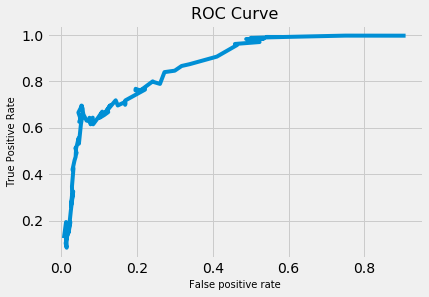

In [72]:
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('ROC Curve',fontsize=16)
axis.set_xlabel('False positive rate',fontsize=10)
axis.set_ylabel('True Positive Rate',fontsize=10)
axis.plot(my_out.iloc[:,3], my_out.iloc[:,2])
plt.show();

## Classification accuracy vs Threshold for classifying as high humidity

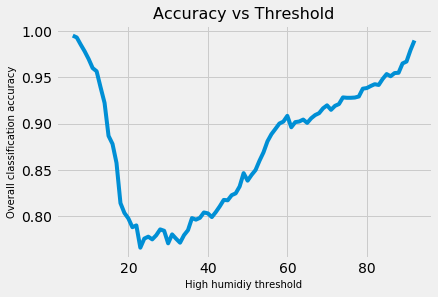

In [73]:
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('Accuracy vs Threshold',fontsize=16)
axis.set_xlabel('High humidiy threshold',fontsize=10)
axis.set_ylabel('Overall classification accuracy',fontsize=10)
axis.plot(my_out.iloc[:,0], my_out.iloc[:,1])
plt.show();